# <center> Loan Prediction </center>
## <center> EXPLORATORY ANALYSIS</center>

---
# <font size=6, color=brown>♦♦♦Table of Contents ♦♦♦</font>
---
**1.** [**Introduction**](#Section1)<br>

**2.** [**Problem Statement**](#Section2)

**3.** [**Importing Libraries**](#Section3)<br>

**4.** [**Data Acquisition & Description**](#Section4)<br>

**5.** [**Data Pre-Profiling**](#Section5)<br>

**6.** [**Exploratory Data Analysis**](#Section6)

---
<a name = Section1></a>
# <font color=blue>**1. Introduction**</font>
---

<a name = Section11></a>
### Company Profile

<div class="alert alert-block alert-danger" >
    
<span style='background:yellow'> <b>Dream Housing Finance company</b></span> deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 
</div>

***

<a name = Section12></a>
### Data Dictionary
<div class="alert alert-block alert-success" >
<b>Train file:</b> CSV containing the customers for whom loan eligibility is known as 'Loan_Status'

|Variable|	Description|
|:-----|:-----|
|Loan_ID|	Unique Loan ID|
|Gender	|Male/ Female|
|Married|	Applicant married (Y/N)|
|Dependents|	Number of dependents|
|Education|	Applicant Education (Graduate/ Under Graduate)|
|Self_Employed|	Self employed (Y/N)|
|ApplicantIncome|	Applicant income|
|CoapplicantIncome|	Coapplicant income|
|LoanAmount|	Loan amount in thousands|
|Loan_Amount_Term|	Term of loan in months|
|Credit_History|	credit history meets guidelines|
|Property_Area|	Urban/ Semi Urban/ Rural|
|Loan_Status|	(Target) Loan approved (Y/N)|
</div>

---

<div class="alert alert-block alert-info" >
<b>Test file:</b> CSV containing the customer information for whom loan eligibility is to be predicted

| Variable |	Description |
| -------- | -------- |
| Loan_ID |	Unique Loan ID |
| Gender	| Male/ Female |
| Married |	Applicant married (Y/N) |
| Dependents |	Number of dependents |
| Education |	Applicant Education (Graduate/ Under Graduate) |
| Self_Employed |	Self employed (Y/N) |
| ApplicantIncome |	Applicant income |
| CoapplicantIncome |	Coapplicant income |
| LoanAmount |	Loan amount in thousands |
| Loan_Amount_Term |	Term of loan in months |
| Credit_History |	credit history meets guidelines |
| Property_Area |	Urban/ Semi Urban/ Rural |
</div>

---
<a name = Section2></a>
# <font color=blue>**2. Problem Statement**</font>
---

<div class="alert alert-block alert-danger" >
    
<span style='background:yellow'> <b>Evaluation Metric</b> </span><br>
Your model performance will be evaluated on the basis of your prediction of loan status for the test data (test.csv), which contains similar data-points as train except for the loan status to be predicted. Your submission needs to be in the format as shown in sample submission.

We at our end, have the actual loan status for the test dataset, against which your predictions will be evaluated. We will use the Accuracy value to judge your response.


<span style='background:yellow'> <b> Public and Private Split </b> </span><br>
Test file is further divided into Public (25%) and Private (75%)

- Your initial responses will be checked and scored on the Public data.
- The final rankings would be based on your private score which will be published once the competition is over.
    
<span style='background:yellow'> <b>Guidelines for Final Submission</b> </span><br>
Please ensure that your final submission includes the following:

1. Solution file containing the predicted sales value in the test dataset (format is given in sample submission csv)
2. Code file for reproducing the submission, note that it is mandatory to submit your code for a valid final submission

<span style='background:yellow'> <b> Data Files</b> </span><br>

1. [Test File](https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/download/test-file)
2. [Train File](https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/download/train-file)

</div>

---
<a name = Section3></a>
# <font color=blue>**3. Importing Libraries**</font>
---

In [2]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings('ignore')                                   # Warnings will appear only once

---
<a name = Section4></a>
# <font color=blue>**4. Data Acquisition and Description**</font>
---

In [5]:
# importing train & test data

train_df=pd.read_csv(r'C:\Users\Mahesh\Downloads\Python\Analytics Vidhya\Loan Prediction\train_ctrUa4K.csv')
test_df=pd.read_csv(r'C:\Users\Mahesh\Downloads\Python\Analytics Vidhya\Loan Prediction\test_lAUu6dG.csv')

In [6]:
# check for data size

print(train_df.shape)
train_df.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
train_df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


---
<a name = Section5></a>
# <font color=blue>**5. Data Pre-Profilling**</font>
---

In [9]:
train1=train_df.copy()

In [10]:
train1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
def ValueCounts(df):
    for col in df.columns:
        print(df[col].value_counts(dropna=False))
        print("="*50, "\n")

In [12]:
ValueCounts(train1.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount'],axis=1))

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Y    422
N    192
Name: Loan_Status, dtype: int64



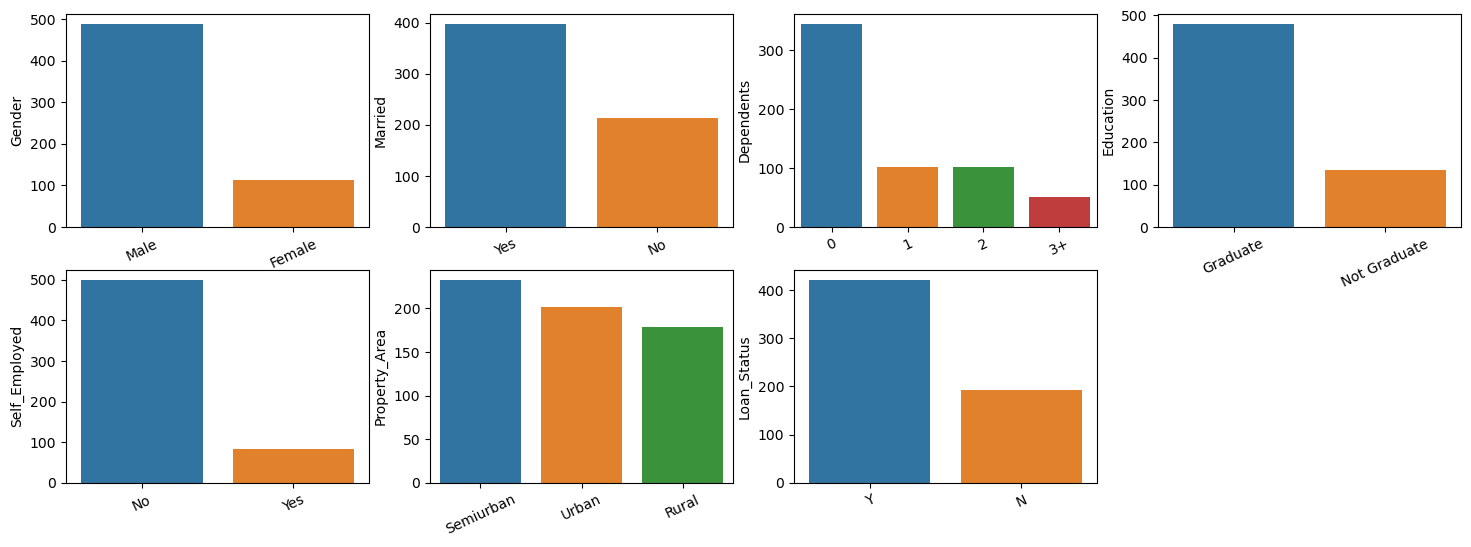

In [13]:
obj=(train1.drop('Loan_ID',axis=1).dtypes=='object')
object_cols=list(obj[obj].index)
plt.figure(figsize=(18,36))
index=1

for col in object_cols:
    y = train1[col].value_counts(dropna=False)
    plt.subplot(11,4,index)
    plt.xticks(rotation=25)
    sns.barplot(x=list(y.index),y=y)
    index+=1

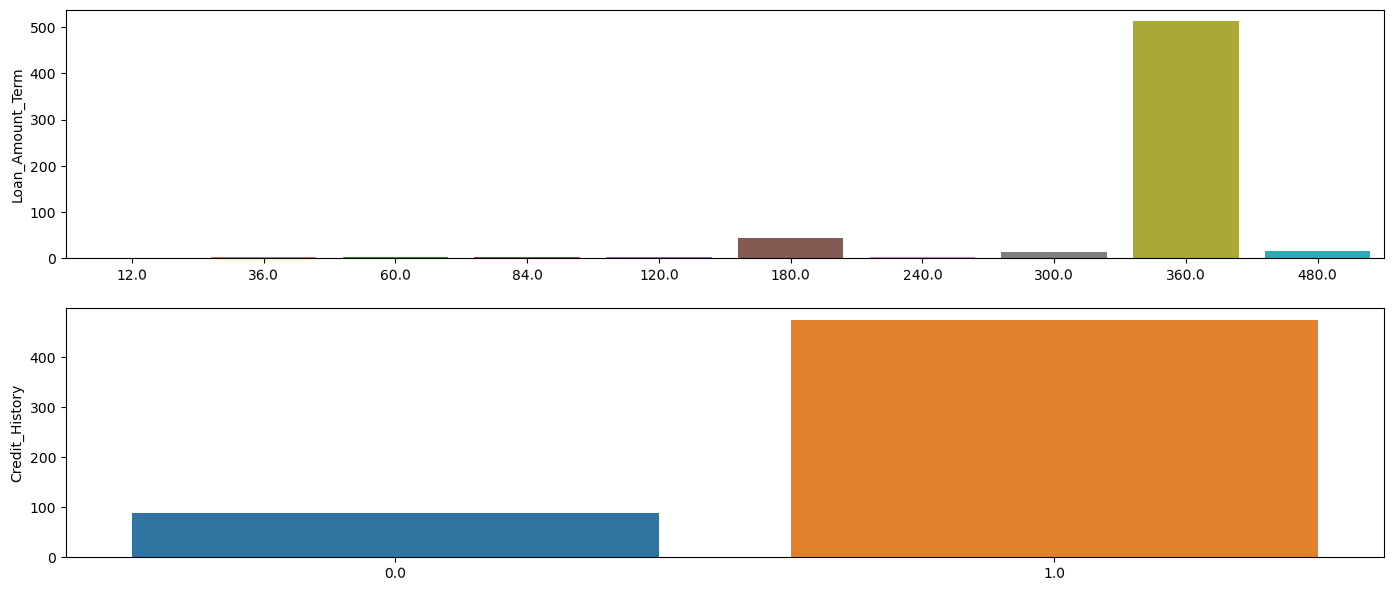

In [14]:
obj=(train1.drop(['Loan_ID','ApplicantIncome','LoanAmount','CoapplicantIncome','LoanAmount'],axis=1).dtypes!='object')
object_cols=list(obj[obj].index)
plt.figure(figsize=(17,42))
index=1

for col in object_cols:
    y = train1[col].value_counts(dropna=False)
    plt.subplot(11,1,index)
    plt.xticks(rotation=1)
    sns.barplot(x=list(y.index),y=y)
    index+=1

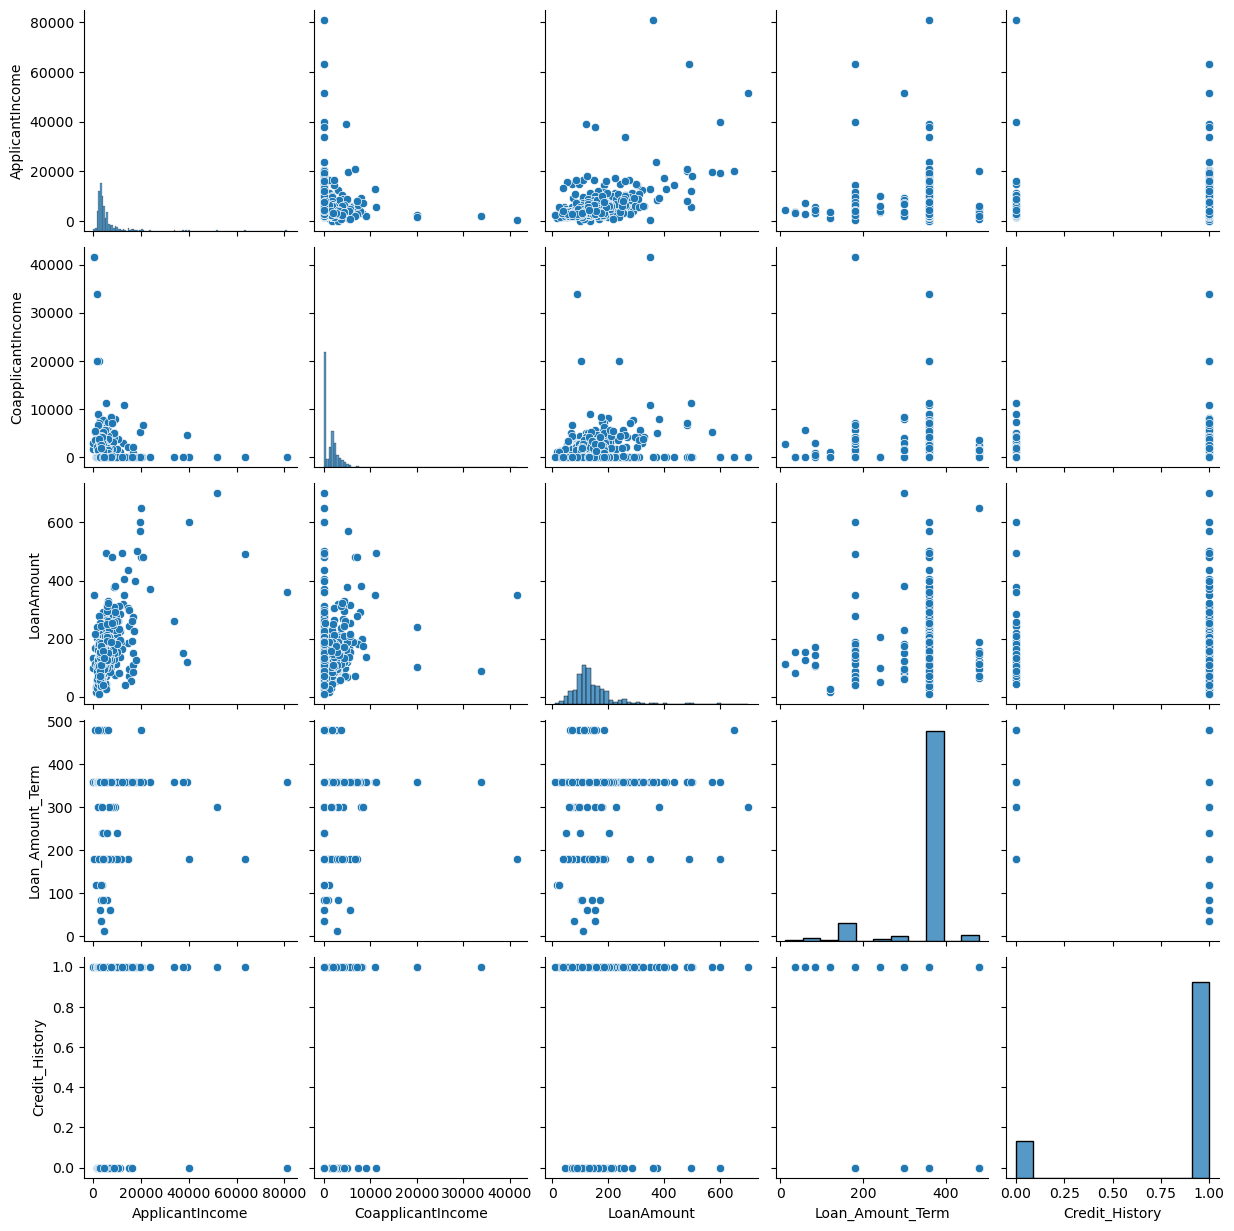

In [15]:
sns.pairplot(train1)

<AxesSubplot:>

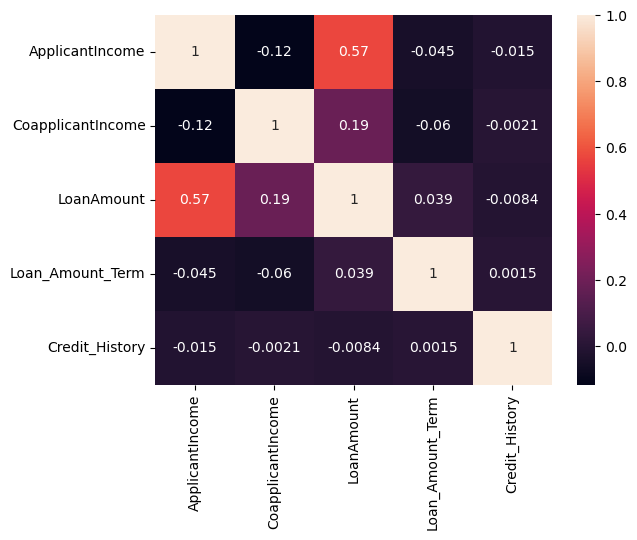

In [16]:
sns.heatmap(train1.corr(), annot=True, )

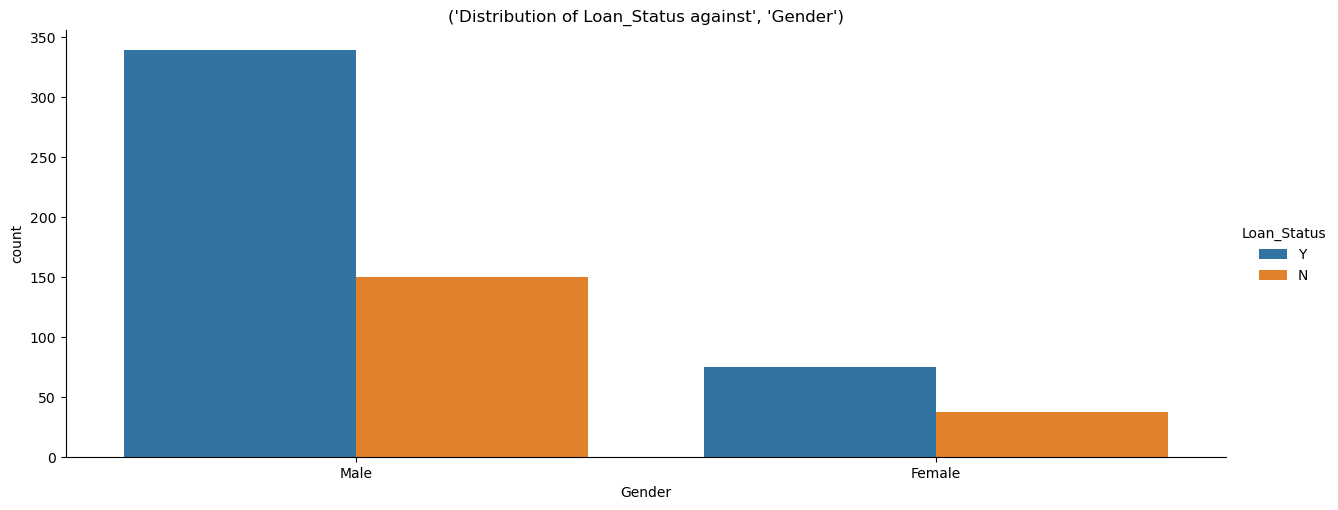

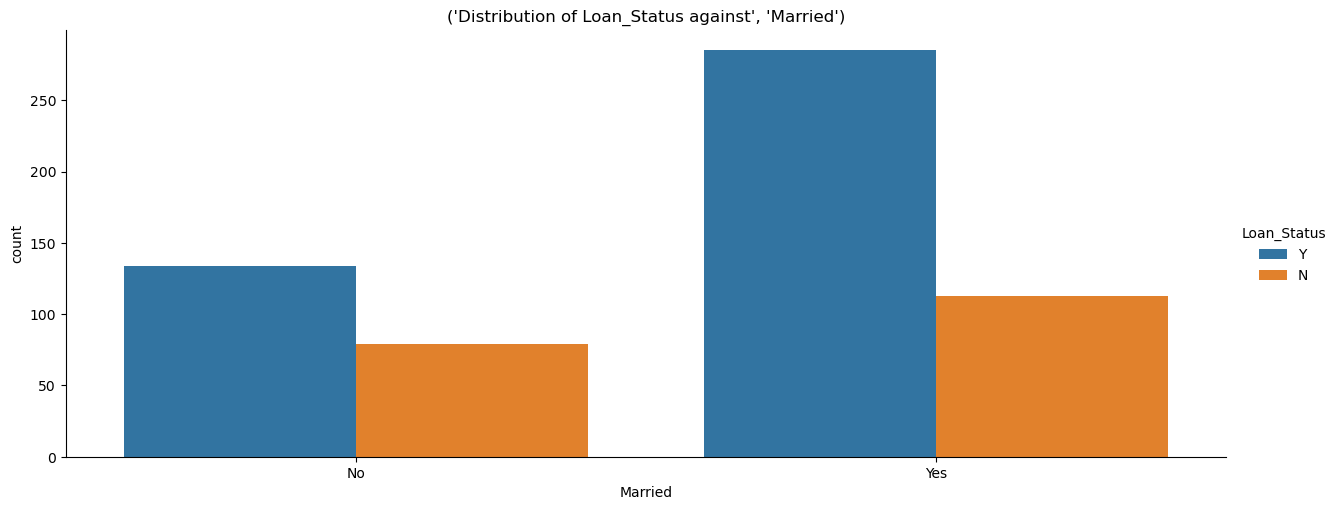

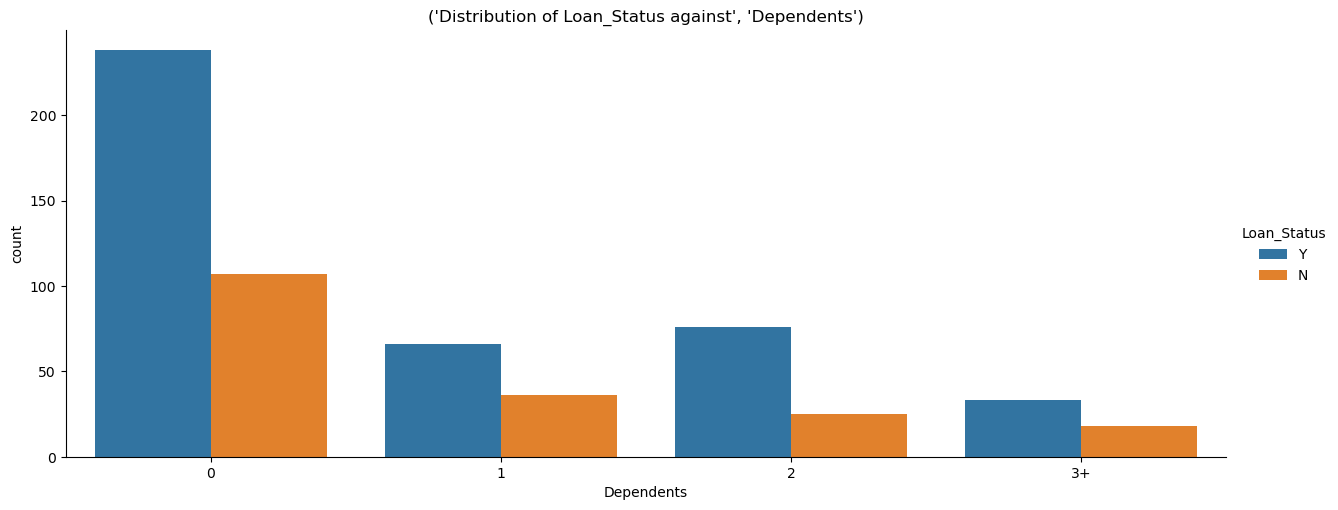

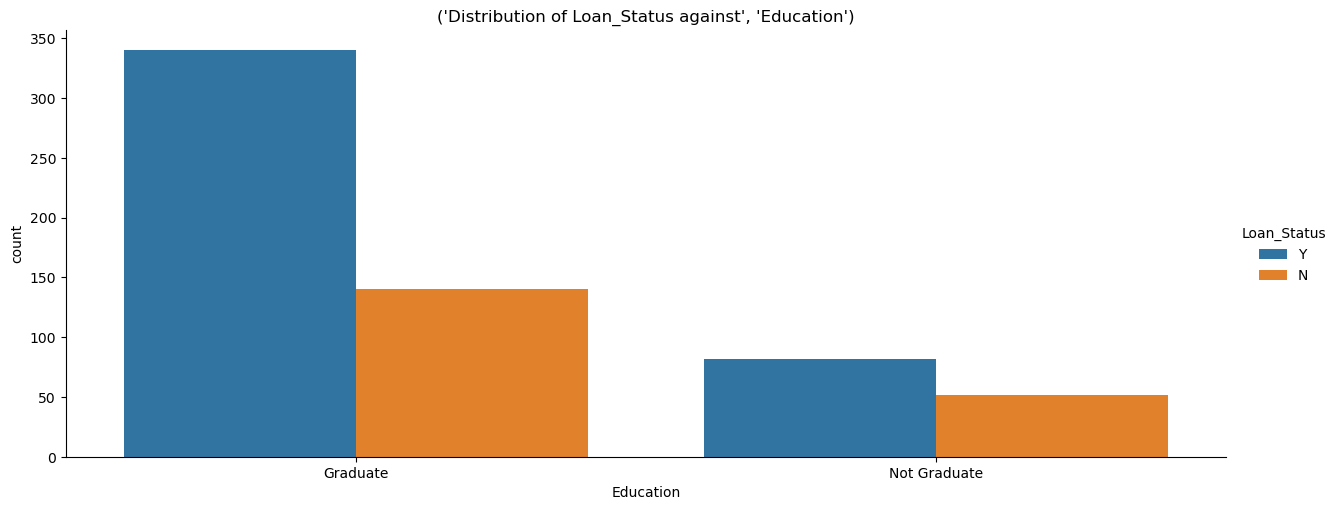

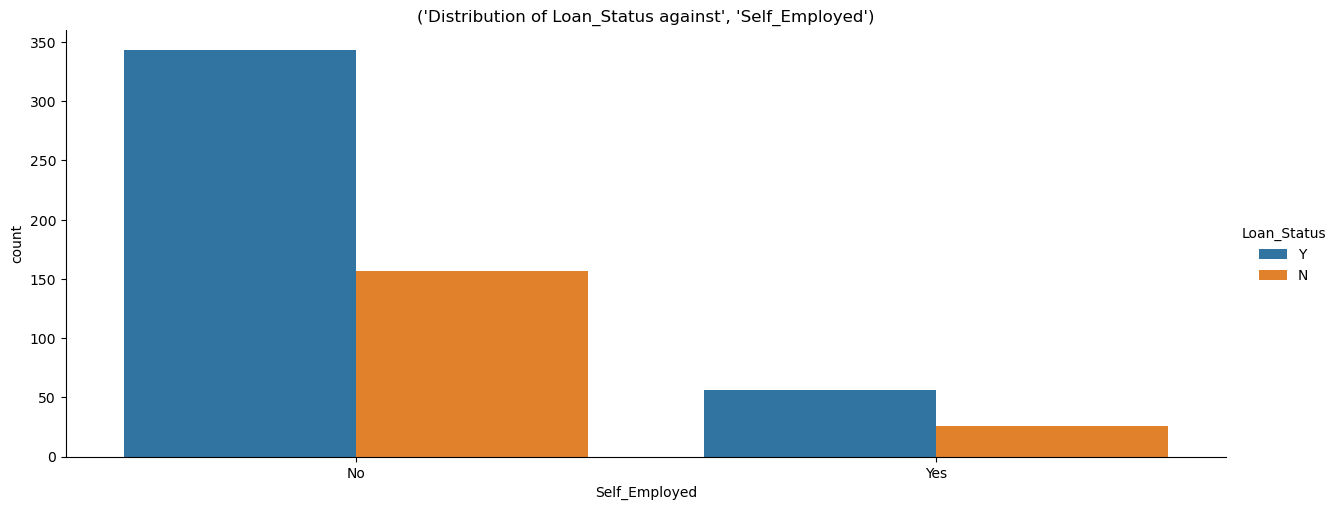

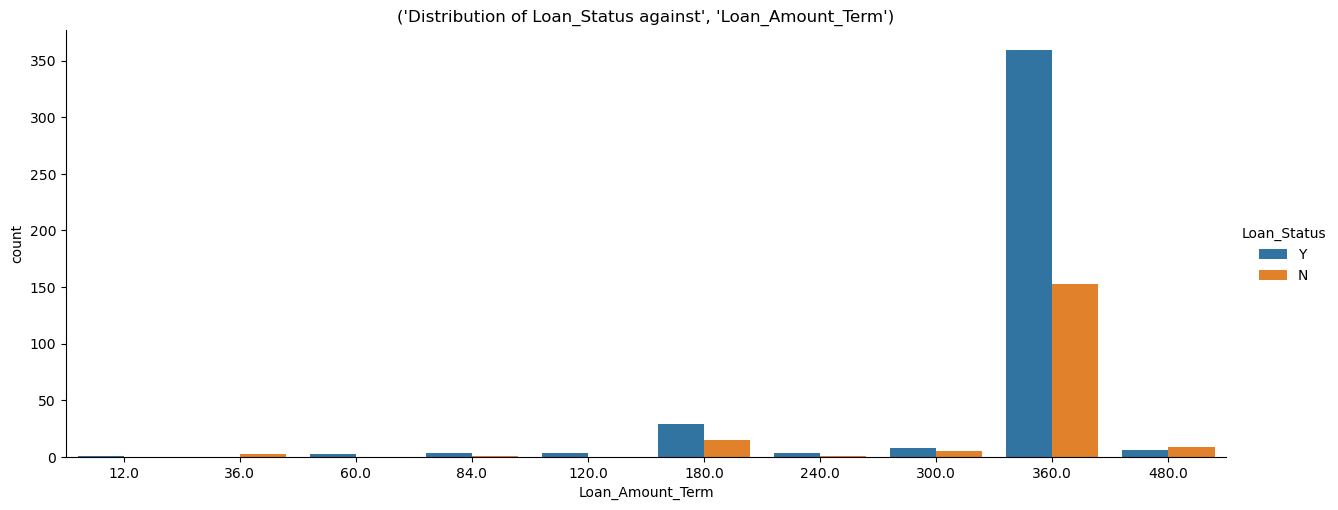

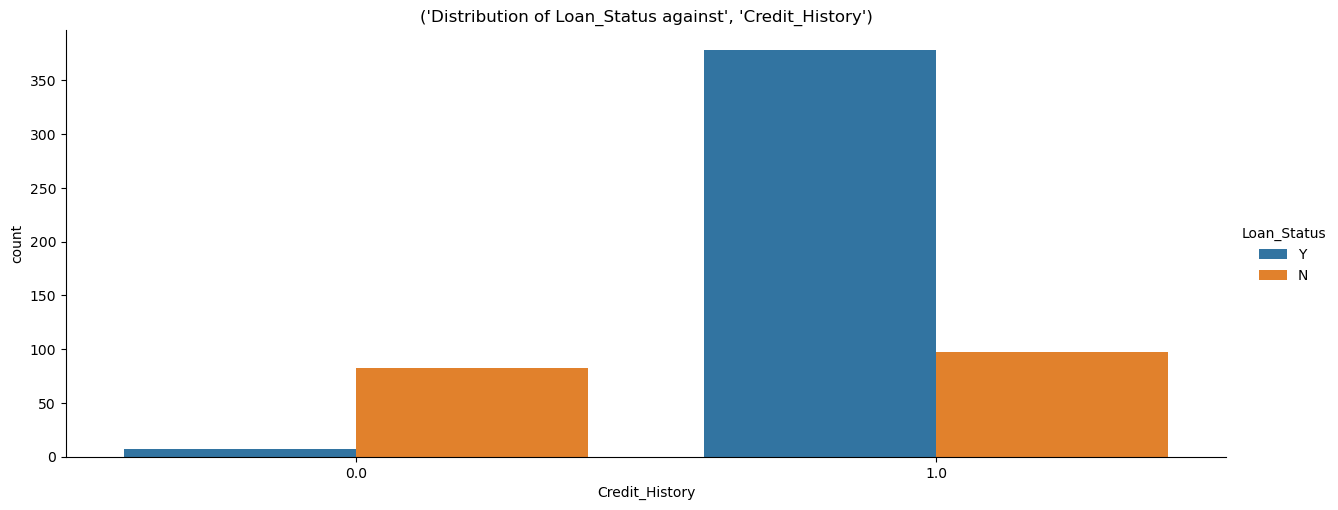

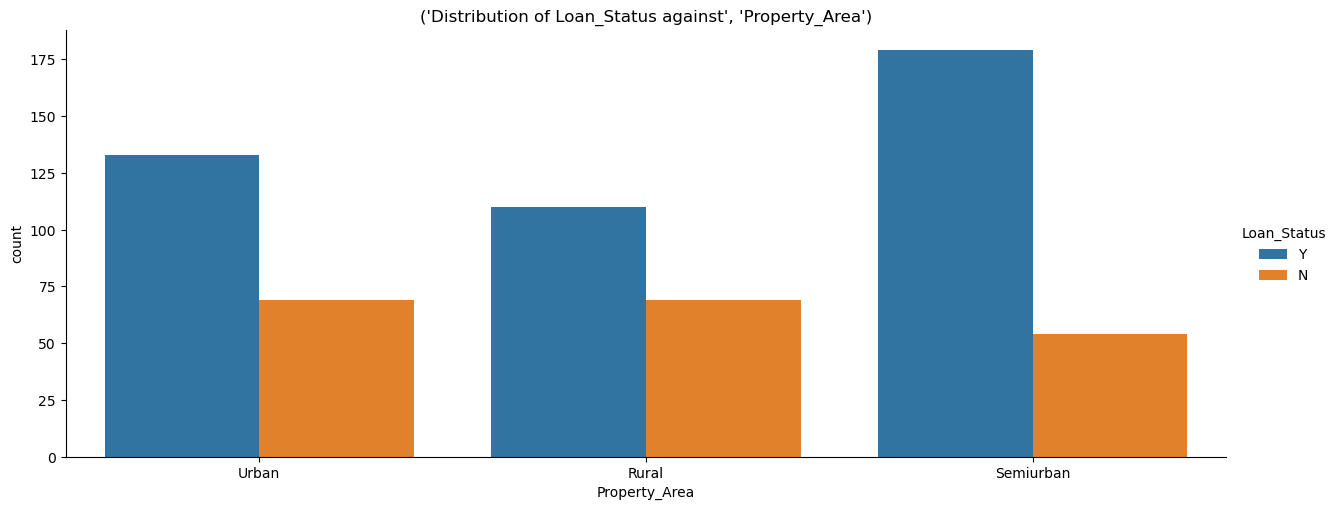

In [17]:
features=['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Loan_Amount_Term',
            'Credit_History', 'Property_Area']

for feature in features:
    t=('Distribution of Loan_Status against', feature)
    sns.catplot(hue='Loan_Status', data=train1, kind='count', x=feature, height=5, aspect=2.5)
#     plt.xticks(rotation=90)
    plt.title(t)
#     plt.show()

In [18]:
train1.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

<div class="alert alert-block alert-warning" >
    <span style='background:yellow'><b> Observations:</b><br></span>
    <div class="alert alert-block alert-info" >
    - The Train Data seems imbalance.<br>
    - There are some missing values in Gender, Married, Dependants, Self_Employed, Loan_Amount, Loan_Amount_Term, Credit_history<br>
    - ApplicantIncome, CoapplicantIncome are Highly positive skewed and Loan_Amount_term & Credit_history both are negatively skewed.<br>
    - Male Applicants are more than Female.<br>
    - Males seems high chances of getting Loan approved.<br>
    - Married applicants seems high chances of getting Loan approved.<br>
    - Applicant with Zero dependant seems high chances of getting Loan approved.<br>
    - Graduate applicants seems high chances of getting Loan approved.<br>
    - Self-Employed applicants seems high chances of getting Loan rejected.<br>
    - Married applicants seems high chances of getting Loan approved.<br>
    - Most of applicants whoes Loan is approved chose 360 months of tenure.<br>
    - Applicants with Credit_History 1 seems Loan approved most.<br>
    - Applicants from Semi-urban seems Loan approved most.<br>

---
<a name = Section6></a>
# <font color=blue>**6A. Data Pre-Processing** : by droping all the Null values</font>
---

In [19]:
train1=train1.dropna()
train1['Credit_History']=train1['Credit_History'].astype('int')
train1['Loan_Amount_Term']=train1['Loan_Amount_Term'].astype('int')
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    int32  
 10  Credit_History     480 non-null    int32  
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(2), int32(2), int64(1), object(8)
memory usage: 48.8+ KB


---
# <font color=blue>7A. EDA1- Business Understanding : dropped null values </font>
---

<b> <font size=4>1. Let See the relationship between Gender & Loan Status by using Chi-Square Test</font></b><br>

1. Null Hypothesis: Gender and Loan status is independent <br>
2. Alternate Hypothesis: Gender and Loan status is dependent

In [17]:
def chi_sq_test(x, y):
  table = pd.crosstab(x,y)
  _,p,_,_ = chi2_contingency(table)
  if p < 0.05:
    print('Reject the Null Hypothesis at p: ', round(p,2))
  else:
    print('Failed to Reject the null hypothesis at p: ', round(p,2))
  return table

In [18]:
chi_sq_test(train1['Gender'],train1['Loan_Status'])

Failed to Reject the null hypothesis at p:  0.2


Loan_Status,N,Y
Gender,,
Female,32,54
Male,116,278


<b> <font size=4>2. Let See the relationship between Education & Loan Status by using Chi-Square Test</font></b><br>

1. Null Hypothesis: Education and Loan status is independent
2. Alternate Hypothesis: Education and Loan status is dependent

In [19]:
chi_sq_test(train1['Education'],train1['Loan_Status'])

Failed to Reject the null hypothesis at p:  0.17


Loan_Status,N,Y
Education,,
Graduate,112,271
Not Graduate,36,61


<b> <font size=4>3. Let See the relationship between Married & Loan Status by using Chi-Square Test</font></b><br>

1. Null Hypothesis: Married and Loan status is independent
2. Alternate Hypothesis: Married and Loan status is dependent

In [20]:
chi_sq_test(train1['Married'],train1['Loan_Status'])

Reject the Null Hypothesis at p:  0.02


Loan_Status,N,Y
Married,,
No,64,105
Yes,84,227


<b> <font size=4>4. Let See the relationship between Self_employed & Loan Status by using Chi-Square Test</font></b><br>

1. Null Hypothesis: Self_employed and Loan status is independent
2. Alternate Hypothesis: Self_employed and Loan status is dependent

In [21]:
chi_sq_test(train1['Self_Employed'],train1['Loan_Status'])

Failed to Reject the null hypothesis at p:  0.54


Loan_Status,N,Y
Self_Employed,,
No,125,289
Yes,23,43


<div class="alert alert-block alert-warning" >
 
### Observation : Relation between the Features and Loan-Status

<div class="alert alert-block alert-warning">

|Feature|Result 
:-|:-
Gender|Independant
Education|Independant
Married|Dependant
Self_Employed|Independant

</div>    
</div>

---
# <font color=blue>**6B. Data Pre-Processing** : by filling all the Null values</font>
---

In [51]:
train2=train_df.copy()

In [52]:
train2.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [53]:
# imput null values

def imput_null(df):
    df['Gender']=df.Gender.fillna(df.Gender.mode()[0])
    df['Married']=df.Married.fillna(df.Married.mode()[0])
    df['Dependents']=df.Dependents.fillna(df.Dependents.mode()[0])
    df['Self_Employed']=df.Self_Employed.fillna(df.Self_Employed.mode()[0])
    df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
    df['LoanAmount']=df.LoanAmount.fillna(df.LoanAmount.mean())
    df['Loan_Amount_Term']=df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mode()[0])
    df['Credit_History']=df.Credit_History.fillna(df.Credit_History.mode()[0])   

In [54]:
imput_null(train2)
train2.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
TotalIncome          0
dtype: int64

In [55]:
train2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [56]:
ValueCounts(train2.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome'],axis=1))

Male      502
Female    112
Name: Gender, dtype: int64

Yes    401
No     213
Name: Married, dtype: int64

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

No     532
Yes     82
Name: Self_Employed, dtype: int64

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

1.0    525
0.0     89
Name: Credit_History, dtype: int64

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Y    422
N    192
Name: Loan_Status, dtype: int64



---
# <font color=blue>7B. EDA1- Business Understanding : dropped null values </font>
---

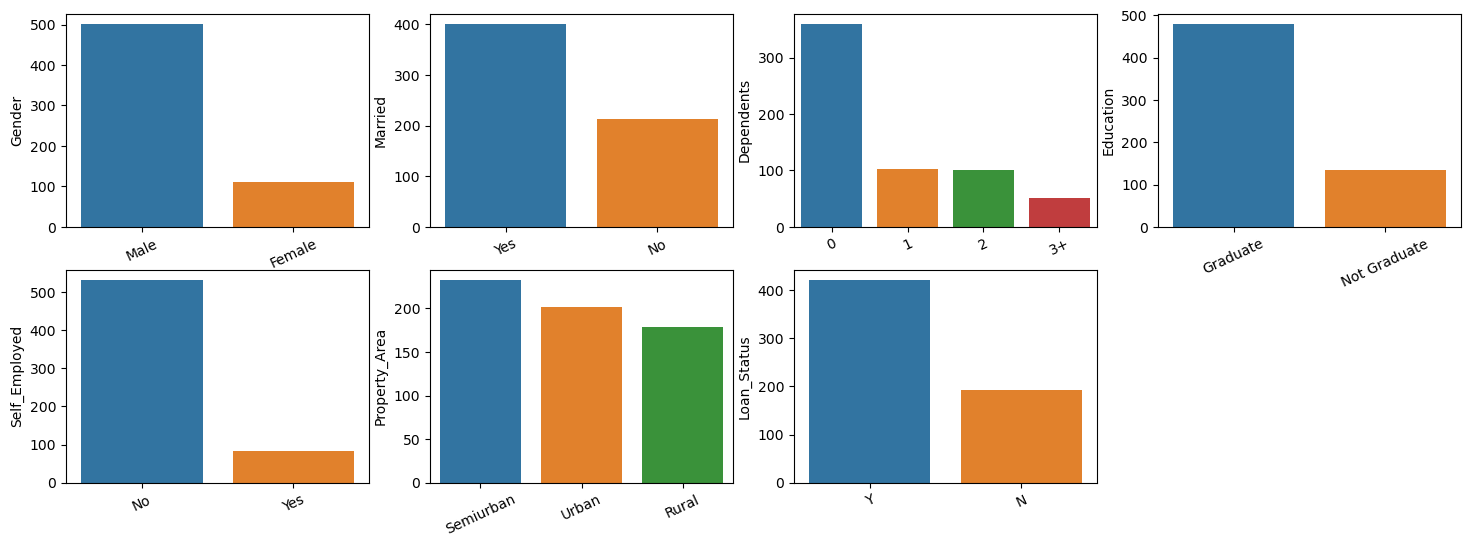

In [57]:
obj=(train2.drop('Loan_ID',axis=1).dtypes=='object')
object_cols=list(obj[obj].index)
plt.figure(figsize=(18,36))
index=1

for col in object_cols:
    y = train2[col].value_counts(dropna=False)
    plt.subplot(11,4,index)
    plt.xticks(rotation=25)
    sns.barplot(x=list(y.index),y=y)
    index+=1

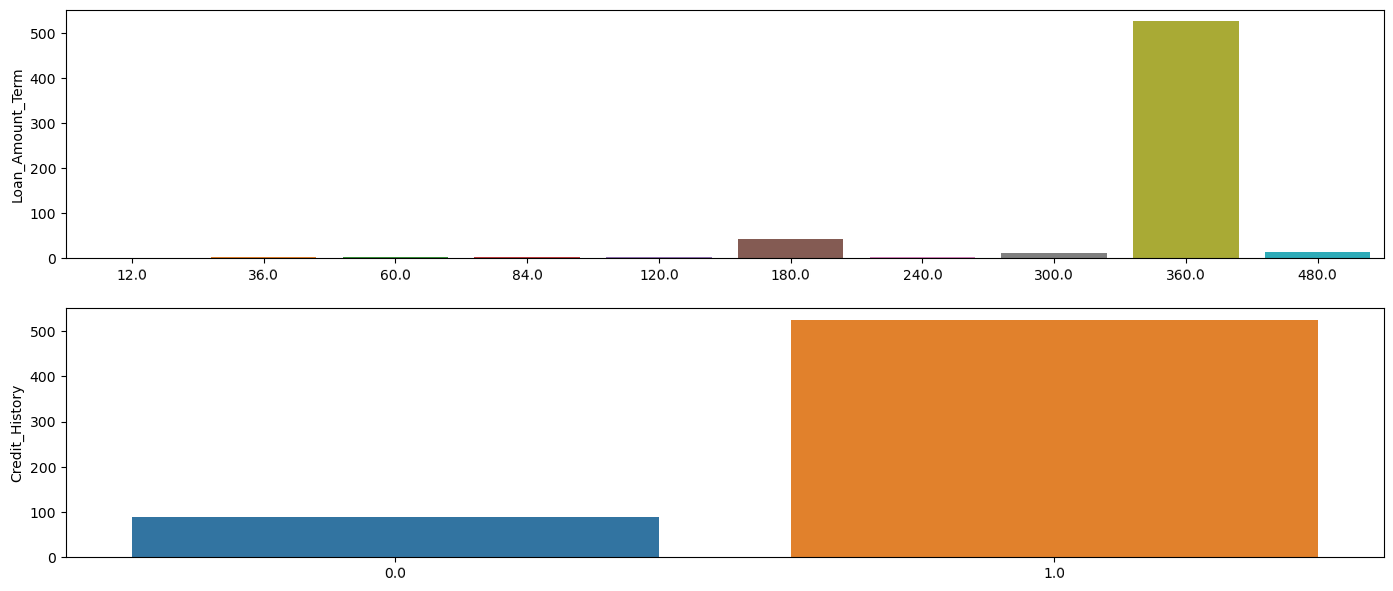

In [58]:
obj=(train2.drop(['Loan_ID','ApplicantIncome','LoanAmount','CoapplicantIncome','LoanAmount',
                  'TotalIncome'],axis=1).dtypes!='object')
object_cols=list(obj[obj].index)
plt.figure(figsize=(17,42))
index=1

for col in object_cols:
    y = train2[col].value_counts(dropna=False)
    plt.subplot(11,1,index)
    plt.xticks(rotation=1)
    sns.barplot(x=list(y.index),y=y)
    index+=1

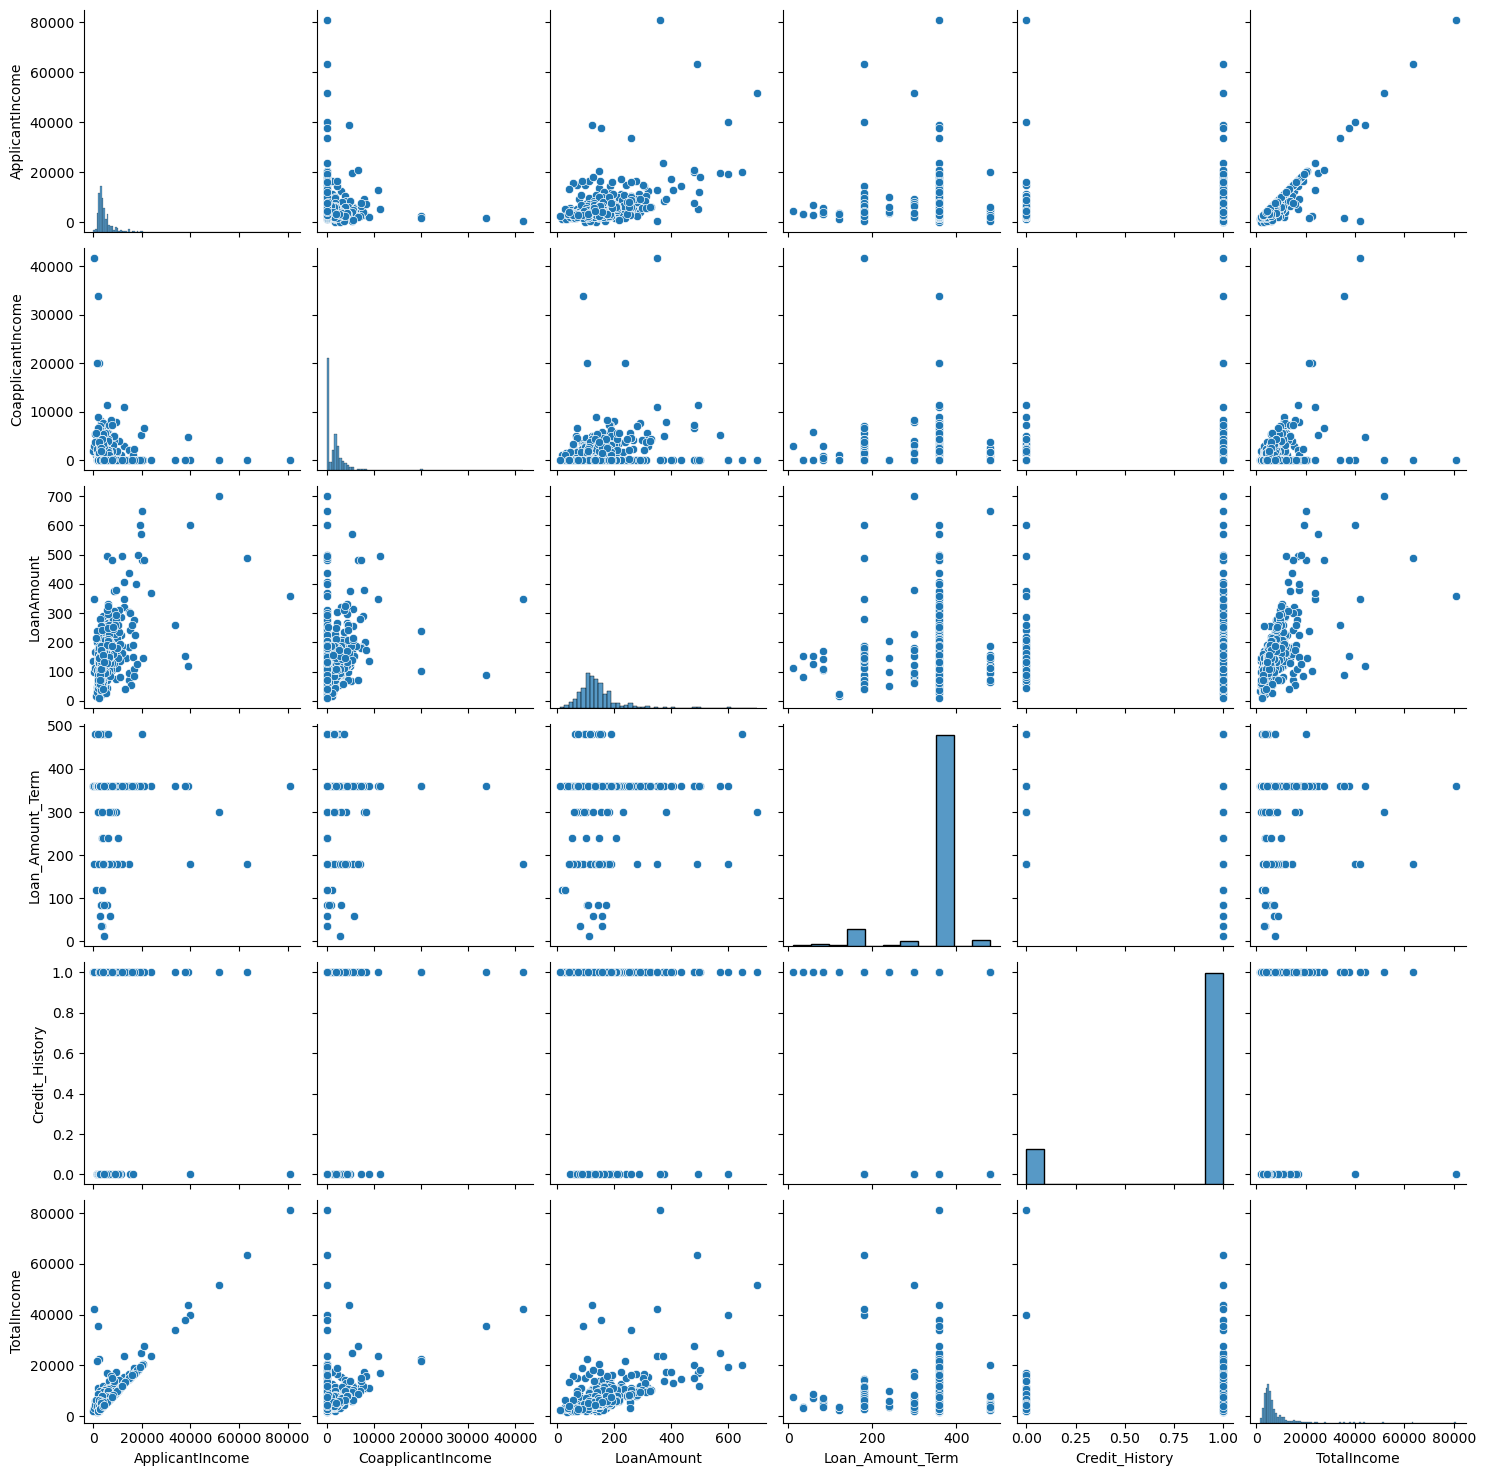

In [59]:
sns.pairplot(train2)

<b> <font size=4>1. Let See the relationship between Gender & Loan Status by using Chi-Square Test</font></b><br>

1. Null Hypothesis: Gender and Loan status is independent <br>
2. Alternate Hypothesis: Gender and Loan status is dependent

In [60]:
chi_sq_test(train2['Gender'],train2['Loan_Status'])

Failed to Reject the null hypothesis at p:  0.74


Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


<b> <font size=4>2. Let See the relationship between Education & Loan Status by using Chi-Square Test</font></b><br>

1. Null Hypothesis: Education and Loan status is independent
2. Alternate Hypothesis: Education and Loan status is dependent

In [61]:
chi_sq_test(train2['Education'],train2['Loan_Status'])

Reject the Null Hypothesis at p:  0.04


Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


<b> <font size=4>3. Let See the relationship between Married & Loan Status by using Chi-Square Test</font></b><br>

1. Null Hypothesis: Married and Loan status is independent
2. Alternate Hypothesis: Married and Loan status is dependent

In [62]:
chi_sq_test(train2['Married'],train2['Loan_Status'])

Reject the Null Hypothesis at p:  0.03


Loan_Status,N,Y
Married,,
No,79,134
Yes,113,288


<b> <font size=4>4. Let See the relationship between Self_employed & Loan Status by using Chi-Square Test</font></b><br>

1. Null Hypothesis: Self_employed and Loan status is independent
2. Alternate Hypothesis: Self_employed and Loan status is dependent

In [63]:
chi_sq_test(train2['Self_Employed'],train2['Loan_Status'])

Failed to Reject the null hypothesis at p:  1.0


Loan_Status,N,Y
Self_Employed,,
No,166,366
Yes,26,56


<div class="alert alert-block alert-warning" >
 
### Observation : Relation between the Features and Loan-Status

<div class="alert alert-block alert-warning">

|Feature|Result 
:-|:-
Gender|Independant
Education|Dependant
Married|Dependant
Self_Employed|Independant

</div>    
</div>